In [1]:
# import libaries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
df=pd.read_csv('superstore.csv')
df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


Here is a description of the columns in the dataset:\

category: The category of products sold in the superstore.

city: The city where the order was placed.

country: The country in which the superstore is located.

customer_id: A unique identifier for each customer.

customer_name: The name of the customer who placed the order.

discount: The discount applied to the order.

market: The market or region where the superstore operates.

ji_lu_shu: An unknown or unspecified column.

order_date: The date when the order was placed.

order_id: A unique identifier for each order.

order_priority: The priority level of the order.

product_id: A unique identifier for each product.

product_name: The name of the product.

profit: The profit generated from the order.

quantity: The quantity of products ordered.

region: The region where the order was placed.

row_id: A unique identifier for each row in the dataset.

sales: The total sales amount for the order.

segment: The customer segment (e.g., consumer, corporate, or home office).

ship_date: The date when the order was shipped.

ship_mode: The shipping mode used for the order.

shipping_cost: The cost of shipping for the order.

state: The state or region within the country.

sub_category: The sub-category of products within the main category.

year: The year in which the order was placed.

market2: Another column related to market information.

weeknum: The week number when the order was placed.

This dataset can be used for various data analysis tasks, including understanding sales patterns, customer behavior, and profitability in the context of a global superstore.

In [3]:
# check the shape of datset
df.shape

(51290, 27)

In [4]:
# check all details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [5]:
# check the null values
df.isna().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [6]:
#change data type object to date time
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [7]:
#check duplicated data
df.duplicated().sum()

0

In [8]:
# check stats
df.describe()

,Discount,记录数,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum
count,51290.000000,51290.0,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000
mean,0.142908,1.0,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,26.375818,2012.777208,31.287112
min,0.000000,1.0,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000
25%,0.000000,1.0,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000
50%,0.000000,1.0,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000
75%,0.200000,1.0,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000
max,0.850000,1.0,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000
std,0.212280,0.0,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795


In [9]:
# drop unknown columns
df.drop('记录数',axis=1,inplace=True)

In [10]:
#remove outliers if any using for loop iqr
def remove_outliers(data, columns):
    for column in columns:
        if column in data.columns:
            Q1 = data[column].quantile(0.25)
            Q3 = data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter the data to keep only non-outliers
            data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    
    return data


clean_df=remove_outliers(df,['Discount','Profit','Quantity','Row.ID','Sales','Shipping.Cost','Year','weeknum'])

In [11]:
#stat of the celan data set
clean_df.describe()

,Discount,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum
count,31775.000000,31775,31775.000000,31775.000000,31775.000000,31775.000000,31775,31775.000000,31775.000000,31775.000000
mean,0.093055,2013-05-11 22:23:22.838709504,12.351458,2.874713,25014.629237,73.250134,2013-05-15 23:58:32.988198144,6.640990,2012.777215,31.291833
min,0.000000,2011-01-01 00:00:00,-57.402000,1.000000,1.000000,1.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000
25%,0.000000,2012-06-20 00:00:00,1.780000,2.000000,12070.500000,24.000000,2012-06-25 00:00:00,1.960000,2012.000000,20.000000
50%,0.000000,2013-07-08 00:00:00,7.680000,3.000000,25077.000000,50.000000,2013-07-11 00:00:00,4.550000,2013.000000,33.000000
75%,0.200000,2014-05-22 00:00:00,19.860000,4.000000,37603.500000,101.000000,2014-05-26 00:00:00,9.610000,2014.000000,44.000000
max,0.500000,2014-12-31 00:00:00,100.788000,7.000000,51290.000000,333.000000,2015-01-07 00:00:00,25.890000,2014.000000,53.000000
std,0.151810,NaN,21.722512,1.612040,14780.744177,66.738460,NaN,6.048856,1.097528,14.399202


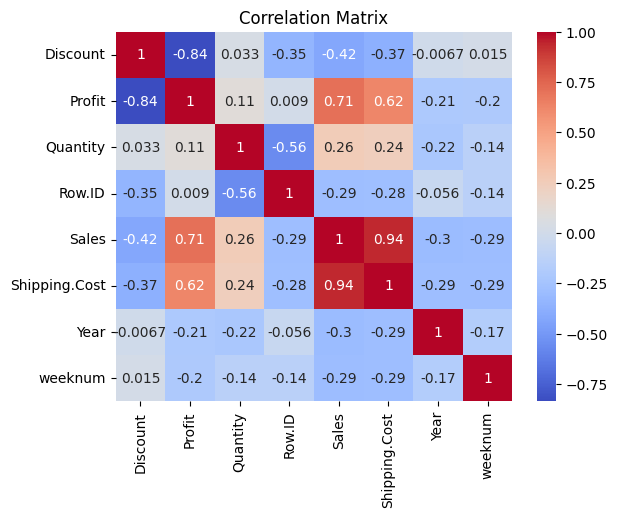

In [12]:
# check corration of the numeric data
df=clean_df.select_dtypes(include='number').corr()
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

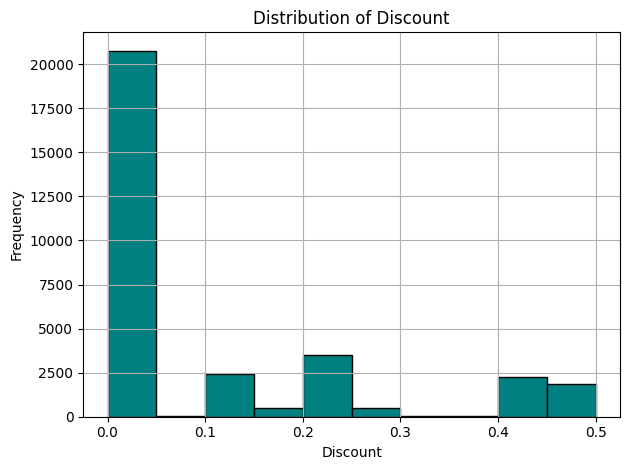

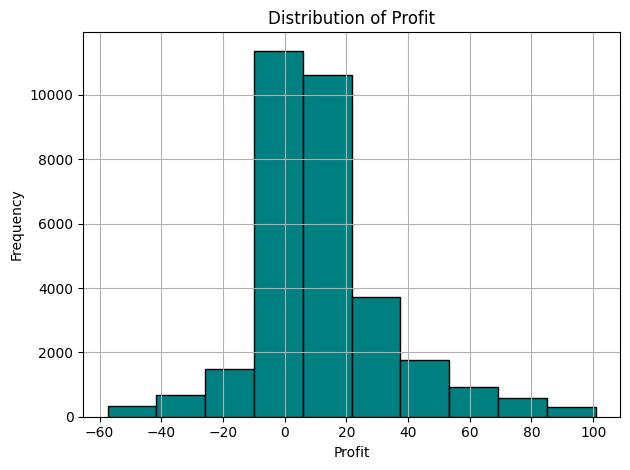

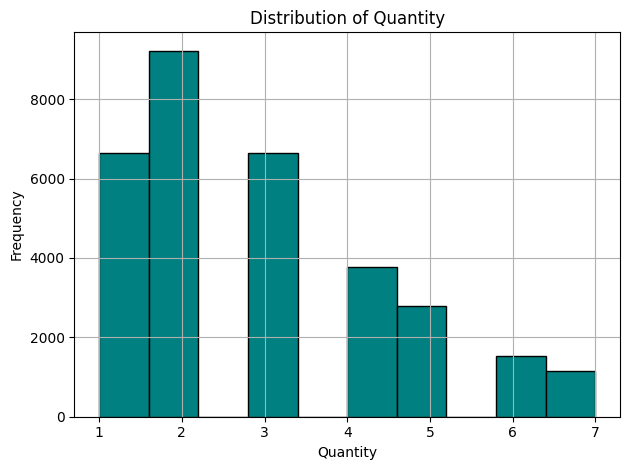

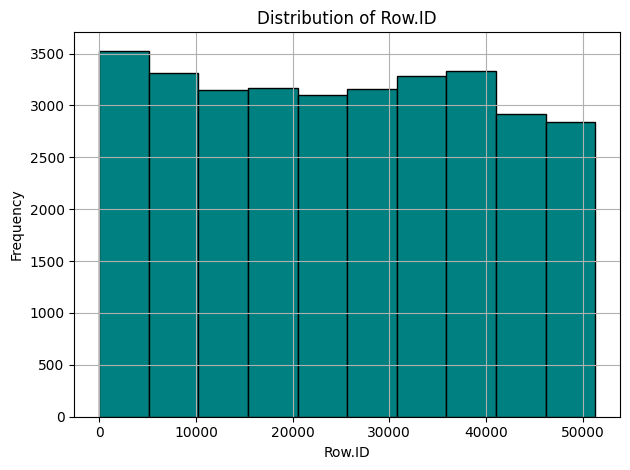

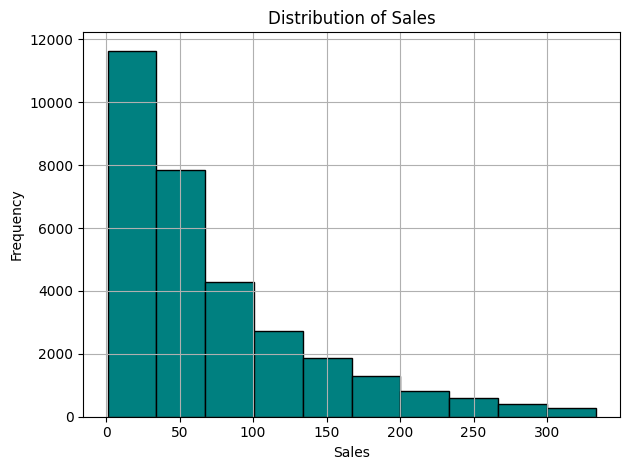

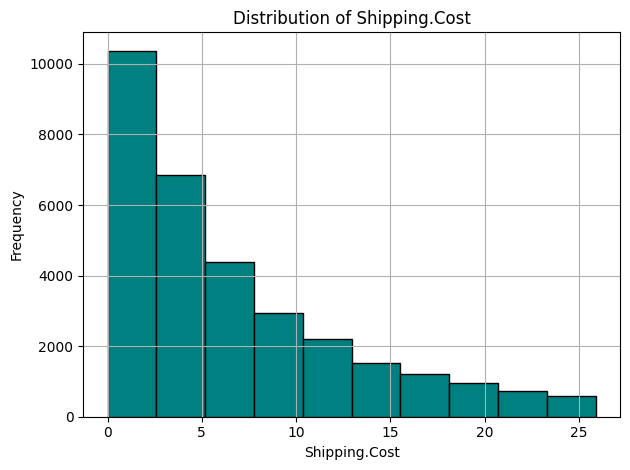

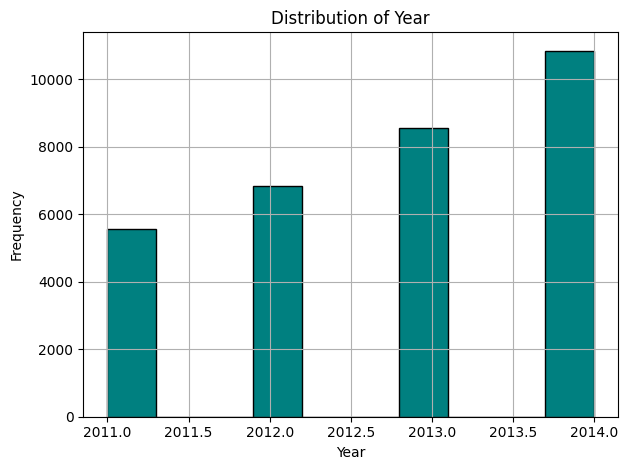

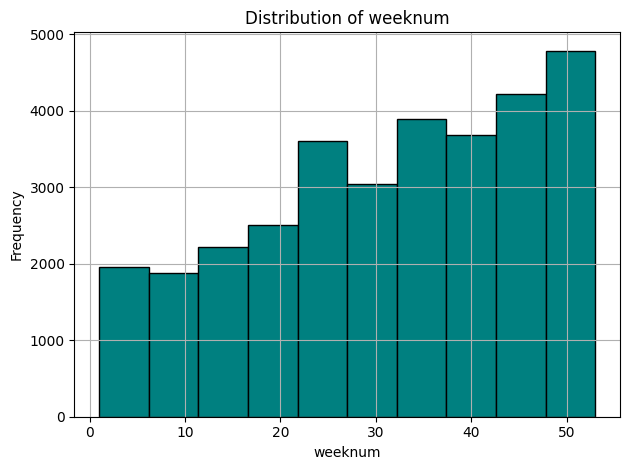

In [13]:
#  histogram  for Select only numeric columns
numeric_df=clean_df.select_dtypes(include='number')
# Loop through each column and plot a histogram
for col in numeric_df.columns:
    plt.hist(numeric_df[col],color='teal', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


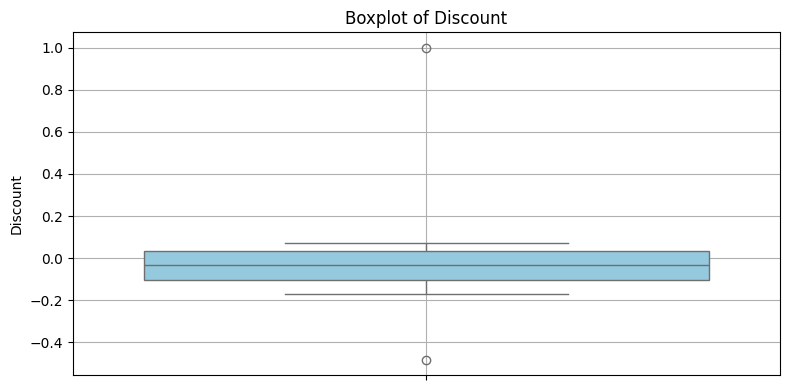

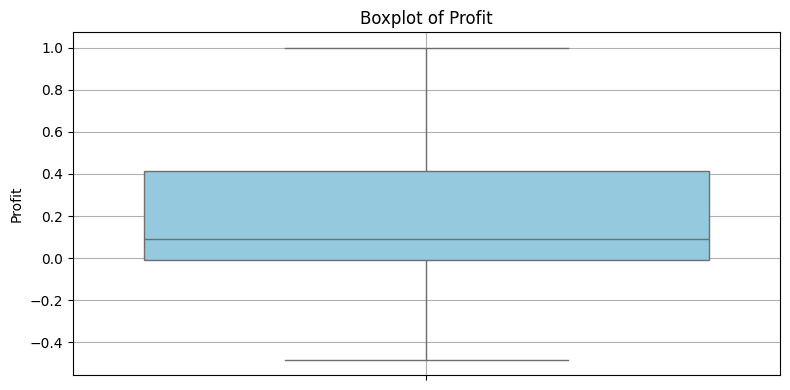

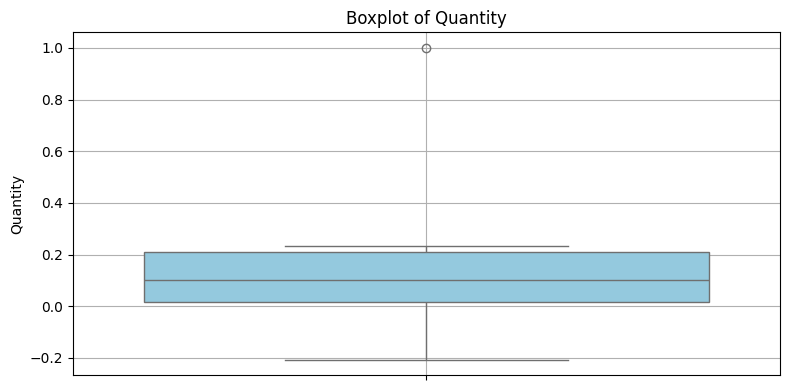

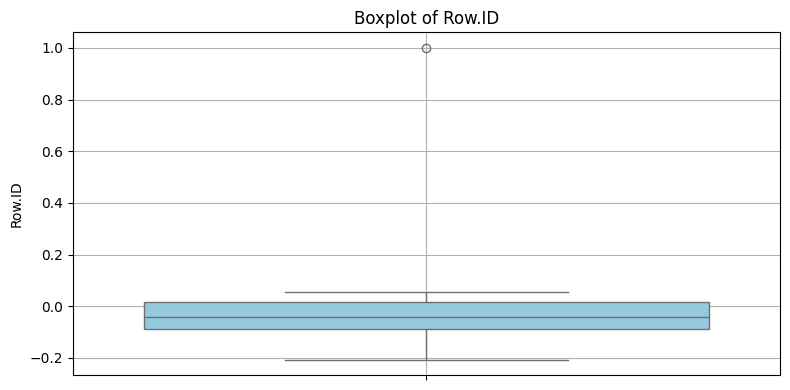

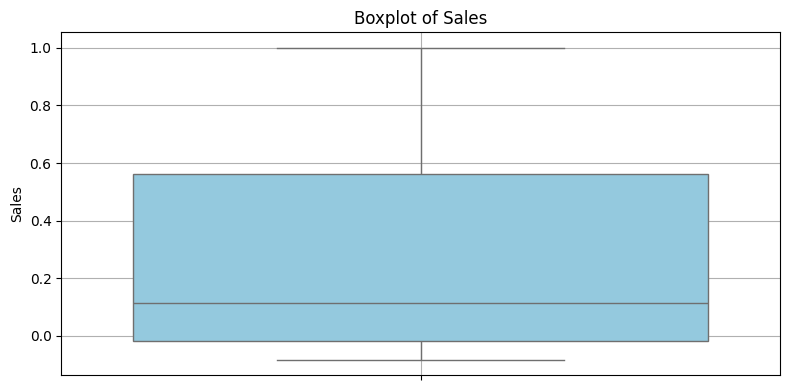

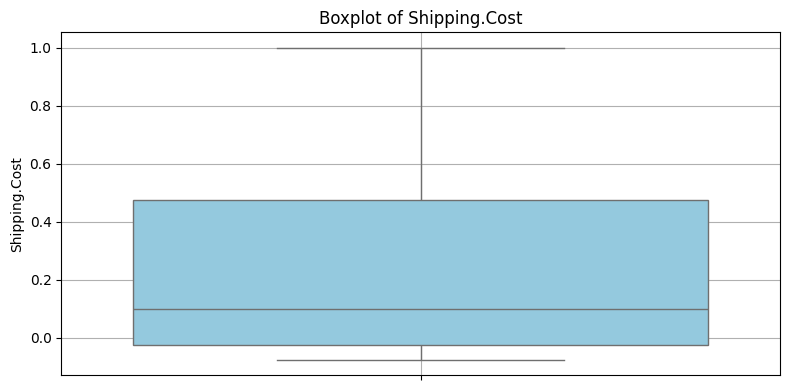

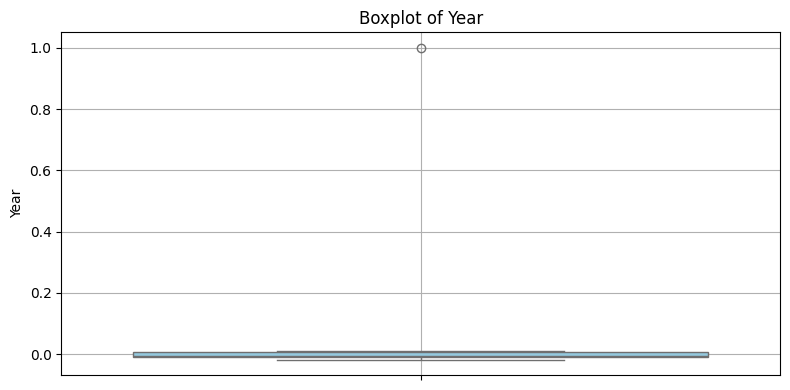

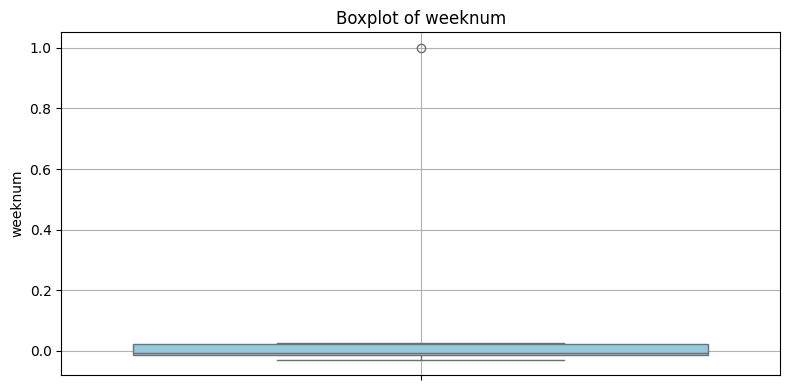

In [14]:

outlier=clean_df.select_dtypes(include='number')
for col in outlier.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

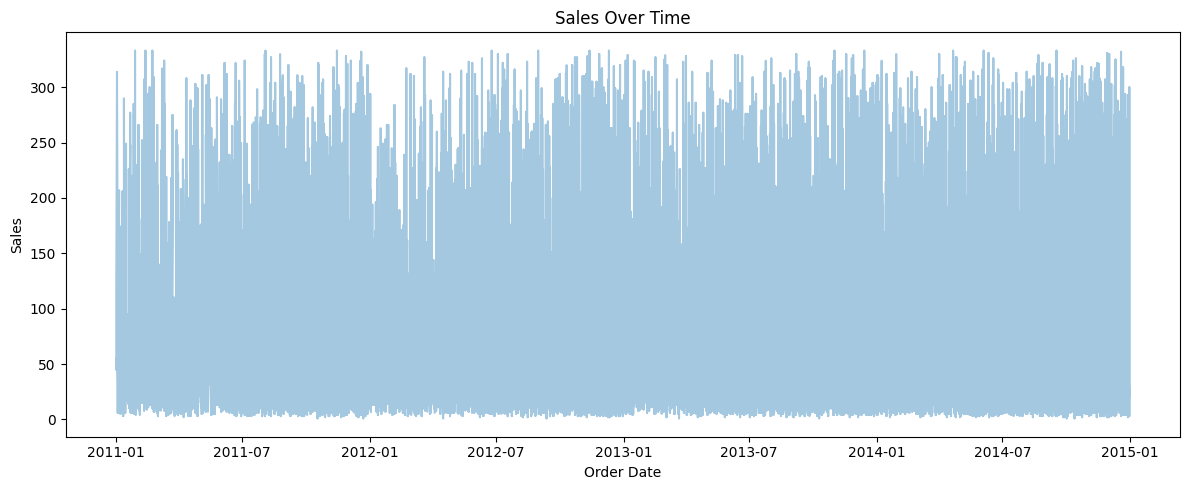

In [15]:
df_cleaned_sorted = clean_df.sort_values("Order.Date")

plt.figure(figsize=(12, 5))
plt.plot(df_cleaned_sorted["Order.Date"], df_cleaned_sorted["Sales"], alpha=0.4)
plt.title("Sales Over Time")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

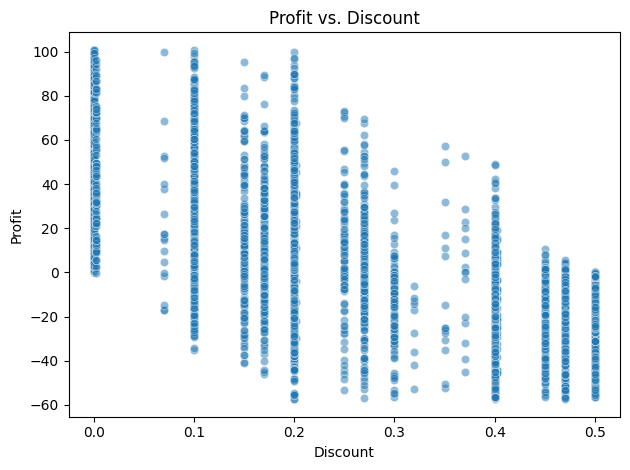

In [17]:
sns.scatterplot(x="Discount", y="Profit", data=clean_df, alpha=0.5)
plt.title("Profit vs. Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

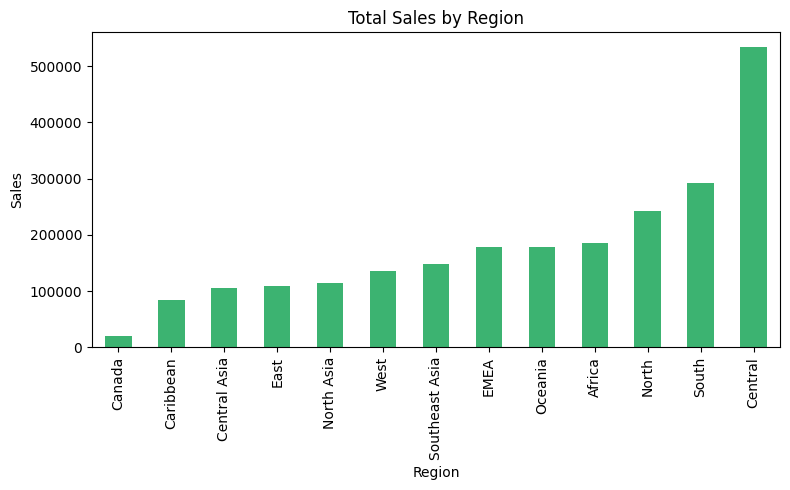

In [18]:
region_sales = clean_df.groupby("Region")["Sales"].sum().sort_values()
plt.figure(figsize=(8, 5))
region_sales.plot(kind="bar", color="mediumseagreen")
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

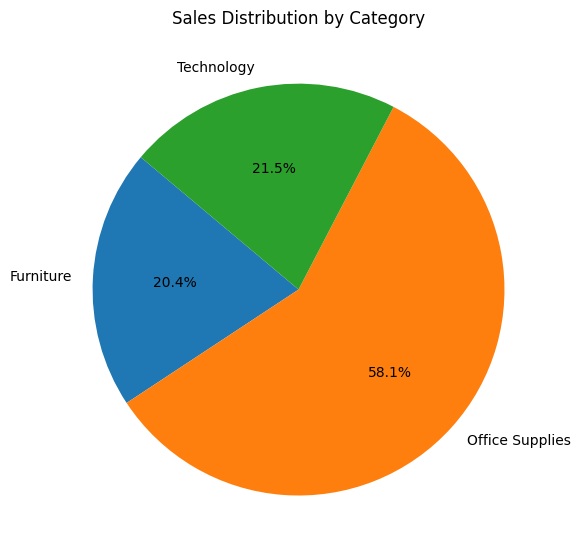

In [19]:
category_sales = clean_df.groupby("Category")["Sales"].sum()
plt.figure(figsize=(6, 6))
category_sales.plot(kind="pie", autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = clean_df[["Profit", "Discount"]]
y = clean_df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate model
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f"R² Score: {r2}")
print(f"Mean Squared Error: {mse}")

R² Score: 0.2934597577569025
Mean Squared Error: 3128.6676458697566


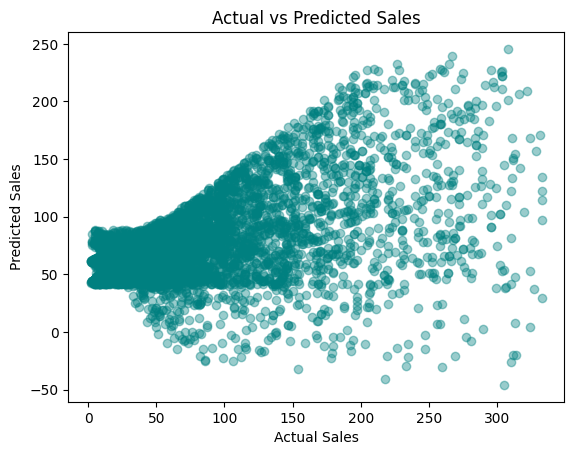

In [25]:
plt.scatter(y_test, y_pred, alpha=0.4, color='teal')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")

plt.show()
